In [9]:
# no. 1
from datetime import datetime

new_year = datetime.now()
day = new_year.day
month = new_year.month
year = new_year.year
hour = new_year.hour
minute = new_year.minute
second = new_year.second
print(day, month, year, hour, minute)


from datetime import date
d = date(2025,12,17)
print(d)
print("Current date: ", d.today())
today = date.today()
print("Current year: ", today.year)
print("Current month: ", today.month)
print("Current day: ", today.day)



18 12 2023 6 39
2025-12-17
Current date:  2023-12-18
Current year:  2023
Current month:  12
Current day:  18
Date string:  17 December, 2023
Date:  2023-12-17 00:00:00


In [8]:
# no. 2
from datetime import datetime
now = datetime.now()
time = now.strftime("%H:%M:%S")
print("Time is: ", time)
time1 = now.strftime("%m/%d/%Y, %H:%M:%S")
print(time1)

Time is:  06:39:00
12/18/2023, 06:39:00


In [12]:
# no. 3
from datetime import datetime
date_string = "17 December, 2023"
print("Date string: ", date_string)
date_object = datetime.strptime(date_string, "%d %B, %Y")
print("Date:", date_object)

Date string:  17 December, 2023
Date: 2023-12-17 00:00:00


In [11]:
# no. 4
from datetime import date
t1 = date(year=2023, month=12, day=18)
t2 = date(year=2024, month=1, day=1)
t3 = t2 - t1
print("Time left for new year:", t3)

Time left for new year: 14 days, 0:00:00


In [5]:
# no.5
from datetime import date
t1 = date(year=1970, month=1, day=1)
t2 = date(year=2023, month=12, day=17)
t3 = t2 - t1
print("Time diffference:", t3)

Time diffference:  19708 days, 0:00:00


Matplotlib is building the font cache; this may take a moment.


Time Series Data:
            value
2023-01-01    0.5
2023-01-02    0.8
2023-01-03    1.2
2023-01-04    1.5
2023-01-05    1.7
2023-01-06    2.0
2023-01-07    2.2
2023-01-08    2.8
2023-01-09    3.0
2023-01-10    3.5


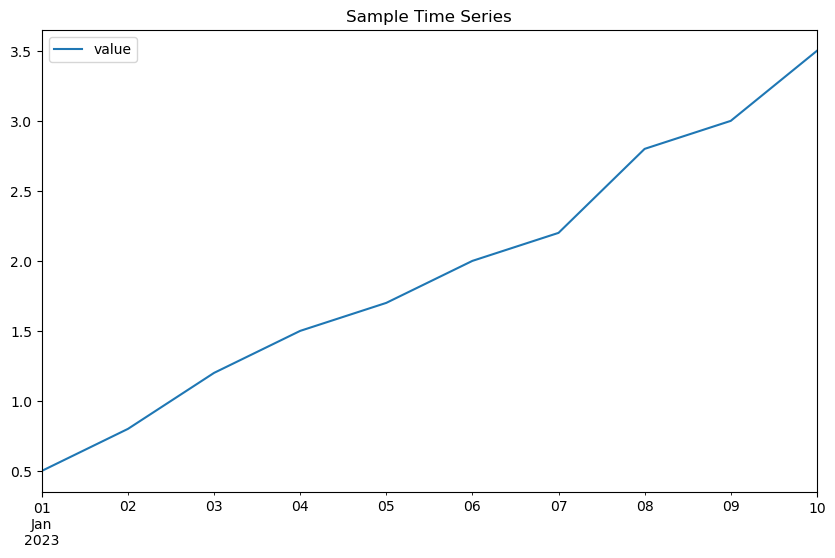

In [13]:
# no. 6
import datetime
import pandas as pd
import matplotlib.pyplot as plt

# Create a sample time series
date_rng = pd.date_range(start='2023-01-01', end='2023-01-10', freq='D')
data = {'value': [0.5, 0.8, 1.2, 1.5, 1.7, 2.0, 2.2, 2.8, 3.0, 3.5]}
df = pd.DataFrame(data, index=date_rng)

# Print the time series data
print("Time Series Data:")
print(df)

# Plot the time series
df.plot(figsize=(10, 6), title='Sample Time Series')
plt.show()


In [14]:
import datetime

# Function to log activities with timestamps
def log_activity(activity):
    timestamp = datetime.datetime.now()
    formatted_timestamp = timestamp.strftime('%Y-%m-%d %H:%M:%S')
    print(f"{formatted_timestamp} - {activity}")
    
log_activity("User login")
log_activity("Data processing started")
log_activity("API request received")


2023-12-18 08:20:16 - User login
2023-12-18 08:20:16 - Data processing started
2023-12-18 08:20:16 - API request received


In [16]:
from flask import Flask, render_template, request, redirect, url_for
import sqlite3
from datetime import datetime

app = Flask(__name__)


DATABASE = 'blog.db'  # SQLite database setup

def create_table():
    with sqlite3.connect(DATABASE) as connection:
        cursor = connection.cursor()
        cursor.execute('''
            CREATE TABLE IF NOT EXISTS posts (
                id INTEGER PRIMARY KEY AUTOINCREMENT,
                title TEXT NOT NULL,
                content TEXT NOT NULL,
                timestamp DATETIME DEFAULT CURRENT_TIMESTAMP
            )
        ''')


create_table()  # Initialize the database table


@app.route('/') # Route to display all posts
def index():
    with sqlite3.connect(DATABASE) as connection:
        cursor = connection.cursor()
        cursor.execute('SELECT * FROM posts ORDER BY timestamp DESC')
        posts = cursor.fetchall()
    return render_template('index.html', posts=posts)


@app.route('/add_post', methods=['GET', 'POST']) # Route to add a new post
def add_post():
    if request.method == 'POST':
        title = request.form['title']
        content = request.form['content']
        timestamp = datetime.now()

        with sqlite3.connect(DATABASE) as connection:
            cursor = connection.cursor()
            cursor.execute('INSERT INTO posts (title, content, timestamp) VALUES (?, ?, ?)',
                           (title, content, timestamp))
            connection.commit()

        return redirect(url_for('index'))

    return render_template('add_post.html')

if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with stat


SystemExit: 1

c:\Users\uer\miniconda3\envs\datascience\Lib\site-packages\IPython\core\interactiveshell.py:3558: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
